In [22]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import platform
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

#한글 깨짐 방지
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')

In [2]:
df = pd.read_csv('dataset_final의 사본1.csv', encoding='utf-8', index_col=0)
df.head()

,행정동_코드,행정동명,상권_구분_코드,상권_코드,상권_코드_명,분기당_매출_금액,분기당_매출_건수,건당_매출액_평균,"환산임대료(원, 21년도)","증감율(%, 19-21년도)",...,프랜차이즈 비율,2021년_2030여성_비율평균,2021년_외국인_평균,문화시설수,지하철_역_수,버스_정거장_수,전체_카페_점포_수,개인카페_점포수,개인카페_비율,활성화_여부
614,11440660,서교동,D,2120103,홍대입구역(홍대),5.463269e+09,345268.5000,15823.246520,149801,6.505,...,0.119495,0.0748,1865.8627,36,5,86,292,242,0.8288,0
615,11440660,서교동,D,2120104,연남동(홍대),4.185808e+09,266968.9167,15679.007870,149801,6.505,...,0.119495,0.0748,1865.8627,36,5,86,242,223,0.9215,0
789,11545510,가산동,D,2120131,가산디지털단지,8.802862e+09,975844.3889,9020.764397,114290,6.200,...,0.309524,0.0547,644.1717,1,2,97,279,151,0.5412,0
986,11650520,서초2동,D,2120189,강남역,1.178592e+10,904123.2500,13035.744940,150037,1.699,...,0.246984,0.0550,416.5434,4,4,51,278,140,0.5036,0
1180,11710642,문정2동,D,2120235,문정역,3.339812e+09,283060.1944,11798.946520,154183,11.267,...,0.253086,0.0528,202.7369,1,2,9,182,132,0.7253,0


In [3]:
#데이터 형태 및 타입 확인
print('dataset shape: ', df.shape)
print(df.info()) 

dataset shape:  (1241, 27)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 614 to 1057
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   행정동_코드             1241 non-null   int64  
 1   행정동명               1241 non-null   object 
 2   상권_구분_코드           1241 non-null   object 
 3   상권_코드              1241 non-null   int64  
 4   상권_코드_명            1241 non-null   object 
 5   분기당_매출_금액          1241 non-null   float64
 6   분기당_매출_건수          1241 non-null   float64
 7   건당_매출액_평균          1241 non-null   float64
 8   환산임대료(원, 21년도)     1241 non-null   int64  
 9   증감율(%, 19-21년도)    1241 non-null   float64
 10  임대료/매출             1241 non-null   float64
 11  매출/임대료             1241 non-null   float64
 12  점포수                1241 non-null   int64  
 13  면적                 1241 non-null   float64
 14  단위면적당 점포 수(k㎡)     1241 non-null   float64
 15  프랜차이즈_점포_수         1241 non-null   int64  


In [4]:
X_features = df.iloc[:,5:-1]
y_label = df.iloc[:,-1]
X_features.drop(['개인카페_비율'], axis=1, inplace=True)

In [5]:
#측도가 다르므로 표준화
st_scaler = StandardScaler()
X_features_st = st_scaler.fit_transform(X_features)
X_features_st

array([[ 5.12232546,  4.30572119,  0.03917629, ...,  4.68736602,
         9.56824251, 11.72197144],
       [ 3.78212208,  3.18766616,  0.02766712, ...,  4.68736602,
         7.82542138, 10.75117903],
       [ 8.62594344, 13.30983737, -0.50361102, ...,  5.45866825,
         9.11510902,  7.07238675],
       ...,
       [-0.43680957, -0.3582013 , -0.51988538, ...,  0.41014453,
        -0.36583796, -0.64285816],
       [-0.53076186, -0.4698771 , -0.67173527, ...,  0.41014453,
        -0.57497649, -0.64285816],
       [-0.24833286, -0.38236195,  0.3959091 , ...,  0.41014453,
         0.08729554,  0.27683991]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_features_st,y_label,
                                   test_size = 0.3,
                                   random_state = 12)

In [7]:
# 1.분산에 의한 선택
from sklearn.feature_selection import VarianceThreshold
varsel = VarianceThreshold(0.16)
X_train_sel1 = varsel.fit_transform(X_train)
X_test_sel1 = varsel.transform(X_test)
X_train_sel1.shape

(868, 20)

In [8]:
# 2. 단일변수선택 <- 우리가 선택
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

sb = SelectKBest(score_func=f_classif) #F통계량을 가지고 변수선택(F통계량이 클수록 y에 미치는 영향이 크다고 판단)
X_train_sel2 = sb.fit_transform(X_train,y_train) 
X_test_sel2 = sb.transform(X_test)
print(X_train_sel2.shape, X_test_sel2.shape) #F통계량이 큰 순서대로 개의 특성변수 뽑음 
f_scores = pd.DataFrame()
f_scores['feature_name'] = X_features.columns
f_scores['F'] = sb.scores_
f_scores['p-values'] = sb.pvalues_
f_scores['support'] = sb.get_support()
f_scores[f_scores['support'] == True].sort_values('F', ascending=False)

(868, 10) (373, 10)


,feature_name,F,p-values,support
18,전체_카페_점포_수,657.407277,2.471792e-174,True
19,개인카페_점포수,609.245386,7.622678e-166,True
0,분기당_매출_금액,483.023501,1.386551e-141,True
1,분기당_매출_건수,403.602317,1.537415e-124,True
11,개인사업자_수,93.224172,2.168612e-37,True
10,프랜차이즈_점포_수,89.850414,3.511178e-36,True
13,2021년_2030여성_비율평균,64.815213,5.898802e-27,True
7,점포수,54.357517,5.790026e-23,True
16,지하철_역_수,46.993411,4.221824e-20,True
14,2021년_외국인_평균,45.680858,1.381568e-19,True


In [9]:
# 선택된 10개의 변수 
X_features_sel = X_features[["분기당_매출_금액","분기당_매출_건수","환산임대료(원, 21년도)","개인사업자_수","점포수","프랜차이즈_점포_수",
                   "2021년_2030여성_비율평균","2021년_외국인_평균","전체_카페_점포_수","개인카페_점포수"]]

In [28]:
# 3. 다른 모형을 이용한 특성 중요도 계산
# 3-1 랜덤포레스트를 이용해 영향력 도출
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

rf = RandomForestClassifier(n_estimators=16).fit(X_train, y_train)
cross_val_score(rf, X_train, y_train, cv=3)
rf.score(X_test, y_test)
print(classification_report(y_test, rf.predict(X_test)))

feature_importance_rf = pd.DataFrame(zip(X_features.columns.values, rf.feature_importances_))
feature_importance_rf.columns = ['feature', 'importance']
feature_importance_rf.sort_values("importance", ascending=False, inplace=True)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.37      0.24      0.29        92
           2       0.75      0.85      0.80       258

    accuracy                           0.70       373
   macro avg       0.67      0.65      0.65       373
weighted avg       0.67      0.70      0.68       373



In [25]:
feature_importance_rf

,feature,importance
18,전체_카페_점포_수,0.146714
19,개인카페_점포수,0.121136
1,분기당_매출_건수,0.087089
0,분기당_매출_금액,0.057736
2,건당_매출액_평균,0.049425
13,2021년_2030여성_비율평균,0.047853
5,임대료/매출,0.044757
10,프랜차이즈_점포_수,0.042470
3,"환산임대료(원, 21년도)",0.041543
4,"증감율(%, 19-21년도)",0.041416


In [27]:
# 3-2. 로지스틱회귀를 이용한 coefficient 도출 
from sklearn.linear_model import LogisticRegression

log_rg = LogisticRegression().fit(X_train, y_train)
cross_val_score(log_rg, X_train, y_train, cv=5)
log_rg.score(X_test, y_test)
print(classification_report(y_test, log_rg.predict(X_test)))

feature_importance_lr = pd.DataFrame(zip(X_features.columns.values, log_rg.coef_.ravel()))
feature_importance_lr.columns = ['feature', 'coef']
feature_importance_lr.sort_values("coef", ascending=False, inplace=True)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.35      0.07      0.11        92
           2       0.74      0.95      0.83       258

    accuracy                           0.73       373
   macro avg       0.63      0.64      0.60       373
weighted avg       0.65      0.73      0.65       373



In [24]:
feature_importance_lr

,feature,coef
19,개인카페_점포수,2.116981
18,전체_카페_점포_수,1.132249
13,2021년_2030여성_비율평균,0.300982
0,분기당_매출_금액,0.295188
14,2021년_외국인_평균,0.229137
8,면적,0.178717
1,분기당_매출_건수,0.163290
12,프랜차이즈 비율,0.142180
17,버스_정거장_수,0.134746
11,개인사업자_수,0.125856


In [26]:
# 3-3.XGBoost 특성변수 중요도 도출
from xgboost import XGBClassifier

xgb = XGBClassifier().fit(X_train, y_train)
cross_val_score(xgb, X_train, y_train, cv=3)
xgb.score(X_test, y_test)
print(classification_report(y_test, xgb.predict(X_test)))

feature_importance_xgb = pd.DataFrame(zip(X_features.columns.values, xgb.feature_importances_))
feature_importance_xgb.columns = ['feature', 'importance']
feature_importance_xgb.sort_values('importance', ascending=False, inplace=True)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.50      0.25      0.33        92
           2       0.76      0.90      0.82       258

    accuracy                           0.73       373
   macro avg       0.70      0.67      0.67       373
weighted avg       0.70      0.73      0.70       373



In [23]:
feature_importance_xgb

,feature,importance
19,개인카페_점포수,0.181716
18,전체_카페_점포_수,0.119912
1,분기당_매출_건수,0.064263
13,2021년_2030여성_비율평균,0.060163
17,버스_정거장_수,0.054168
10,프랜차이즈_점포_수,0.052241
7,점포수,0.047350
0,분기당_매출_금액,0.045816
11,개인사업자_수,0.042493
3,"환산임대료(원, 21년도)",0.041220


In [13]:
### 오버샘플링
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=101)

X_features_sel_st = st_scaler.fit_transform(X_features_sel)
X_train_over2, y_train_over2 = smote.fit_resample(X_features_sel_st, y_label) 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_over2,y_train_over2,
                                   test_size = 0.3,
                                   random_state = 12)

2    841
1    301
0     99
Name: 활성화_여부, dtype: int64


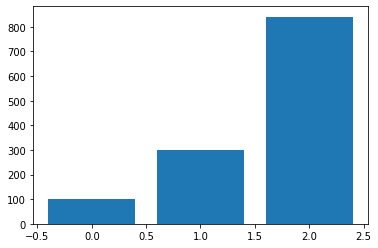

Class=0, n=841 (33.333%)
Class=1, n=841 (33.333%)
Class=2, n=841 (33.333%)
SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (1241, 10) (1241,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (2523, 10) (2523,)
SMOTE 적용 후 값의 분포 :
 0    841
1    841
2    841
Name: 활성화_여부, dtype: int64


In [15]:
# 클래스 확인 
print(df["활성화_여부"].value_counts())

x_label = list(i for i in df["활성화_여부"].unique())
y_count = list(count for count in df["활성화_여부"].value_counts()[x_label])
plt.bar(x_label, y_count)
plt.show()

counter = Counter(y_train_over2)
for k,v in counter.items():
	per = v / len(y_train_over2) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

    
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_features_sel_st.shape, y_label.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over2.shape, y_train_over2.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over2).value_counts() )   

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

#로지스틱다항회귀 초모수
logistic = LogisticRegression(multi_class='multinomial')
lg_param_grid = [{'solver': ['sag','saga','lbfgs'], 'C':[0.01,0.1,1.0,10.0,100.0]}]
lg_gs = GridSearchCV(estimator=logistic, param_grid=lg_param_grid, scoring='f1_micro', cv=inner_cv)
lg_gs.fit(X_train2, y_train2)
print(lg_gs.best_score_, lg_gs.best_params_, '\n')

0.7525391628145865 {'C': 1.0, 'solver': 'lbfgs'} 



In [30]:
##로지스틱다항회귀
logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1.0)
logistic.fit(X_train2, y_train2) 
mlg_y_train_pred = logistic.predict(X_train2)
mlg_y_test_pred = logistic.predict(X_test2)

print('train f1_score :', f1_score(y_train2, mlg_y_train_pred, average='micro'))
print('test f1_score :', f1_score(y_test2, mlg_y_test_pred, average='micro'),"\n")
print(confusion_matrix(y_test2, mlg_y_test_pred))
print(classification_report(y_test2, mlg_y_test_pred))


train f1_score : 0.7559456398640997
test f1_score : 0.76221928665786 

[[243   4   0]
 [  2 155 109]
 [  4  61 179]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       247
           1       0.70      0.58      0.64       266
           2       0.62      0.73      0.67       244

    accuracy                           0.76       757
   macro avg       0.77      0.77      0.76       757
weighted avg       0.77      0.76      0.76       757



In [31]:
#의사결정나무 초모수
Dtree = tree.DecisionTreeClassifier()
dt_param_grid = [{'max_depth': list(range(2,10)), 'min_samples_split':[1,2,3,4,5],'min_samples_leaf' : [1,2,3,4,5]}]
dt_gs = GridSearchCV(estimator=Dtree, param_grid=dt_param_grid, scoring='f1_micro', cv=inner_cv)
dt_gs.fit(X_train2, y_train2)
print(dt_gs.best_score_, dt_gs.best_params_, '\n')

0.7661723163841808 {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3} 



In [33]:
#의사결정나무
Dtree = tree.DecisionTreeClassifier(max_depth=8, min_samples_split=3, min_samples_leaf=1)
Dtree.fit(X_train2, y_train2)
tree_y_train_pred = Dtree.predict(X_train2) 
tree_y_test_pred = Dtree.predict(X_test2)

print('train f1_score :', f1_score(y_train2, tree_y_train_pred, average='micro'))
print('test f1_score :', f1_score(y_test2, tree_y_test_pred, average='micro'))

print(confusion_matrix(y_test2, tree_y_test_pred))
print(classification_report(y_test2, tree_y_test_pred))

train f1_score : 0.8522083805209513
test f1_score : 0.8005284015852048
[[241   4   2]
 [  1 195  70]
 [  3  71 170]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       247
           1       0.72      0.73      0.73       266
           2       0.70      0.70      0.70       244

    accuracy                           0.80       757
   macro avg       0.80      0.80      0.80       757
weighted avg       0.80      0.80      0.80       757



In [32]:
#XGBoost 초모수
XGB_model = XGBClassifier()
xgb_param_grid = [{'min_child_weight': [1,3,6,10], 'gamma':[1,5,7,10,12,15]}]
xgb_gs = GridSearchCV(estimator=XGB_model, param_grid=xgb_param_grid, scoring='f1_micro', cv=inner_cv)
xgb_gs.fit(X_train2, y_train2)
print(xgb_gs.best_score_, xgb_gs.best_params_)

0.8171192860811505 {'gamma': 1, 'min_child_weight': 3}


In [38]:
#XGBoost
XGB_model = XGBClassifier(min_child_weight=3, gamma=4)
XGB_model.fit(X_train2, y_train2) 
xg_y_train_pred = XGB_model.predict(X_train2) 
xg_y_test_pred = XGB_model.predict(X_test2) 

print('train f1_score :', f1_score(y_train2, xg_y_train_pred, average='micro'))
print('test f1_score :', f1_score(y_test2, xg_y_test_pred, average='micro')) 

print(confusion_matrix(y_test2, xg_y_test_pred)) 
print(classification_report(y_test2, xg_y_test_pred))

train f1_score : 0.8142695356738392
test f1_score : 0.8031704095112285
[[244   3   0]
 [  4 190  72]
 [  4  66 174]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       247
           1       0.73      0.71      0.72       266
           2       0.71      0.71      0.71       244

    accuracy                           0.80       757
   macro avg       0.80      0.81      0.80       757
weighted avg       0.80      0.80      0.80       757



In [35]:
scores = cross_val_score(xgb_gs, X_train2, y_train2, scoring='f1_micro', cv=outer_cv)
print('CV f1: %.3f +/- %.f' % (np.mean(scores), np.std(scores)))

CV f1: 0.809 +/- 0
